Hosts inicializados
Canais inicializados
Pares EPRs adicionados


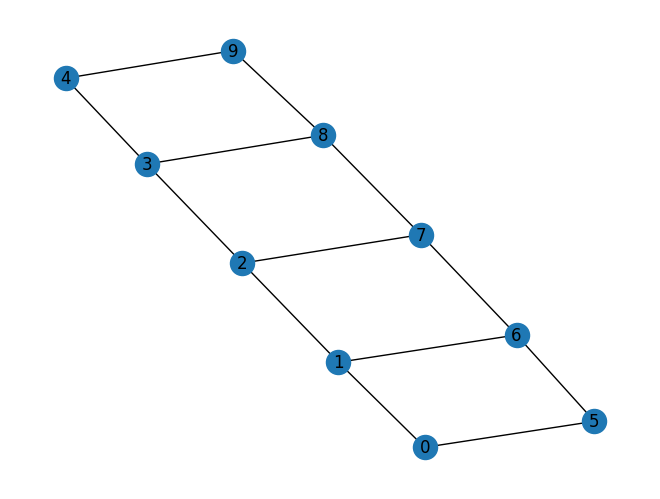

In [10]:
# Inicialização comum da rede
from quantumnet.components import Controller, Network, Host
rede = Network()
controlador = Controller(rede)
rede.set_ready_topology("Grade", 2, 5)
rede.draw()

As decisões são objetos com o método verify que retorna True ou False, dependendo da request recebida. O controlador tem um dicionário cujas chaves são os métodos verify das decisões e os valores são as ações que serão tomadas. 

In [11]:
alice_id = 0
bob_id = 8
fmin = 0.7
eprs = 3
request = [alice_id, bob_id, fmin, eprs]
actions = controlador.apply_decision(request)

Decisão aplicada: (Normal E2E,)


In [12]:
alice = rede.get_host(alice_id)
controlador.add_match_route_roule_in_host(request, alice)
print(alice.flow_table)

Decisão aplicada: (Normal E2E,)
Ações qualificadas: {1: [CreateEPR(0-5), CreateEPR(5-6), CreateEPR(6-7), CreateEPR(7-8)], 2: [Swap(0-5), Swap(5-6), Swap(6-7), Swap(7-8)]}
{(8, 0.7, 3): ([0, 5, 6, 7, 8], {1: [CreateEPR(0-5), CreateEPR(5-6), CreateEPR(6-7), CreateEPR(7-8)], 2: [Swap(0-5), Swap(5-6), Swap(6-7), Swap(7-8)]})}


In [13]:
request2 = [alice_id, 8, 0.5, 1]
alice.find_roule_by_request(request2)

([0, 5, 6, 7, 8],
 {1: [CreateEPR(0-5), CreateEPR(5-6), CreateEPR(6-7), CreateEPR(7-8)],
  2: [Swap(0-5), Swap(5-6), Swap(6-7), Swap(7-8)]})

In [14]:
flow = alice.find_roule_by_request(request2)

In [15]:
print("Tabela de fluxo de Alice", alice.flow_table)
print("Fluxo de Alice", flow)


Tabela de fluxo de Alice {(8, 0.7, 3): ([0, 5, 6, 7, 8], {1: [CreateEPR(0-5), CreateEPR(5-6), CreateEPR(6-7), CreateEPR(7-8)], 2: [Swap(0-5), Swap(5-6), Swap(6-7), Swap(7-8)]})}
Fluxo de Alice ([0, 5, 6, 7, 8], {1: [CreateEPR(0-5), CreateEPR(5-6), CreateEPR(6-7), CreateEPR(7-8)], 2: [Swap(0-5), Swap(5-6), Swap(6-7), Swap(7-8)]})


In [16]:
roule = flow[1]

In [17]:
print("Roule", roule)

Roule {1: [CreateEPR(0-5), CreateEPR(5-6), CreateEPR(6-7), CreateEPR(7-8)], 2: [Swap(0-5), Swap(5-6), Swap(6-7), Swap(7-8)]}


In [18]:
from quantumnet.objects import Logger
Logger.activate(Logger)
controlador.run_roule(roule)

2024-11-08 14:19:49,204: Timeslot 5: Buscando rota válida entre 0 e 5.
2024-11-08 14:19:49,205: Rota válida encontrada: [0, 5]
2024-11-08 14:19:49,205: Timeslot 6: Realizando Entanglement Swapping.
2024-11-08 14:19:49,206: Entanglement Swapping concluído com sucesso entre 0 e 5
2024-11-08 14:19:49,206: Timeslot 7: Buscando rota válida entre 5 e 6.
2024-11-08 14:19:49,207: Rota válida encontrada: [5, 6]
2024-11-08 14:19:49,207: Timeslot 8: Realizando Entanglement Swapping.
2024-11-08 14:19:49,208: Entanglement Swapping concluído com sucesso entre 5 e 6
2024-11-08 14:19:49,208: Timeslot 9: Buscando rota válida entre 6 e 7.
2024-11-08 14:19:49,209: Rota válida encontrada: [6, 7]
2024-11-08 14:19:49,209: Timeslot 10: Realizando Entanglement Swapping.
2024-11-08 14:19:49,209: Entanglement Swapping concluído com sucesso entre 6 e 7
2024-11-08 14:19:49,210: Timeslot 11: Buscando rota válida entre 7 e 8.
2024-11-08 14:19:49,210: Rota válida encontrada: [7, 8]
2024-11-08 14:19:49,211: Timeslot 